In [1]:
# import packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import geopandas as gpd

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

import dask.dataframe as dd
#from dask_ml.datasets import make_regression

from sklearn.model_selection import train_test_split



import math
from scipy import stats
from sklearn.linear_model import LinearRegression


from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline

#import ArcgisLib

# suppress warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

In [3]:
cols = ['FULLVAL', 'BLDGCL', 'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'STORIES',
       'BLDFRONT', 'BLDDEPTH', 'Borough', 'nearest_grocery',
       'nearest_subway_entrance', 'nearest_basketball_court',
       'nearest_daycare_facility', 'nearest_athletic_facility', 'nearest_park',
       'total_arrests', 'normalized_arrest_cnt', 'tract_tot_pop']

In [4]:
log_cols = ['BLDGCL', 'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'STORIES',
       'BLDFRONT', 'BLDDEPTH', 'Borough', 'nearest_grocery',
       'nearest_subway_entrance', 'nearest_basketball_court',
       'nearest_daycare_facility', 'nearest_athletic_facility', 'nearest_park',
       'total_arrests', 'normalized_arrest_cnt', 'tract_tot_pop']

In [5]:
training_data = pd.DataFrame(np.concatenate((y_train.reshape(len(y_train),1),X_train),axis=1))
#training_data.columns=["y"]+["x{}".format(i) for i in range(1,18)]

test_data = pd.DataFrame(np.concatenate((y_test.reshape(len(y_test),1),X_test),axis=1))
#test_data.columns=["y"]+["x{}".format(i) for i in range(1,18)]

In [6]:
training_data.columns = cols
test_data.columns = cols

In [7]:
training_data.head()

,FULLVAL,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,STORIES,BLDFRONT,BLDDEPTH,Borough,nearest_grocery,nearest_subway_entrance,nearest_basketball_court,nearest_daycare_facility,nearest_athletic_facility,nearest_park,total_arrests,normalized_arrest_cnt,tract_tot_pop
0,299188.0,37.0,1.0,44.627777,102.016934,2.0,23.824379,35.693967,4.0,19.736226,6.638024,0.820990,0.481849,0.988151,0.403712,56.0,0.036435,1537.0
1,456000.0,5.0,0.0,20.000000,100.000000,2.0,15.000000,34.000000,3.0,3.592440,1.438046,1.495495,0.243891,0.366221,0.397952,5.0,0.002521,1983.0
2,222000.0,8.0,0.0,31.000000,95.000000,2.0,19.000000,29.000000,4.0,19.857282,6.838195,0.627303,0.293203,0.884143,0.341863,56.0,0.036435,1537.0
3,716000.0,1.0,0.0,40.000000,100.000000,2.0,26.000000,34.000000,3.0,6.119097,4.160749,0.427542,0.799178,0.450989,0.463846,13.0,0.006448,2016.0
4,558000.0,1.0,0.0,50.000000,100.000000,2.0,20.000000,25.000000,3.0,8.591949,1.433162,0.758978,0.447454,0.622004,0.387162,5.0,0.002998,1668.0


In [8]:
# training_data = training_data.drop(['total_arrests'], axis=1)
# training_data.head()

In [9]:
# test_data = test_data.drop(['total_arrests'], axis=1)
# test_data.head()

In [10]:
# training_data['Borough'] = training_data['Borough'] + 1
# test_data['Borough'] = test_data['Borough'] + 1

In [11]:
training_data.head()

,FULLVAL,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,STORIES,BLDFRONT,BLDDEPTH,Borough,nearest_grocery,nearest_subway_entrance,nearest_basketball_court,nearest_daycare_facility,nearest_athletic_facility,nearest_park,total_arrests,normalized_arrest_cnt,tract_tot_pop
0,299188.0,37.0,1.0,44.627777,102.016934,2.0,23.824379,35.693967,4.0,19.736226,6.638024,0.820990,0.481849,0.988151,0.403712,56.0,0.036435,1537.0
1,456000.0,5.0,0.0,20.000000,100.000000,2.0,15.000000,34.000000,3.0,3.592440,1.438046,1.495495,0.243891,0.366221,0.397952,5.0,0.002521,1983.0
2,222000.0,8.0,0.0,31.000000,95.000000,2.0,19.000000,29.000000,4.0,19.857282,6.838195,0.627303,0.293203,0.884143,0.341863,56.0,0.036435,1537.0
3,716000.0,1.0,0.0,40.000000,100.000000,2.0,26.000000,34.000000,3.0,6.119097,4.160749,0.427542,0.799178,0.450989,0.463846,13.0,0.006448,2016.0
4,558000.0,1.0,0.0,50.000000,100.000000,2.0,20.000000,25.000000,3.0,8.591949,1.433162,0.758978,0.447454,0.622004,0.387162,5.0,0.002998,1668.0


In [12]:
training_data[log_cols].head()

,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,STORIES,BLDFRONT,BLDDEPTH,Borough,nearest_grocery,nearest_subway_entrance,nearest_basketball_court,nearest_daycare_facility,nearest_athletic_facility,nearest_park,total_arrests,normalized_arrest_cnt,tract_tot_pop
0,37.0,1.0,44.627777,102.016934,2.0,23.824379,35.693967,4.0,19.736226,6.638024,0.820990,0.481849,0.988151,0.403712,56.0,0.036435,1537.0
1,5.0,0.0,20.000000,100.000000,2.0,15.000000,34.000000,3.0,3.592440,1.438046,1.495495,0.243891,0.366221,0.397952,5.0,0.002521,1983.0
2,8.0,0.0,31.000000,95.000000,2.0,19.000000,29.000000,4.0,19.857282,6.838195,0.627303,0.293203,0.884143,0.341863,56.0,0.036435,1537.0
3,1.0,0.0,40.000000,100.000000,2.0,26.000000,34.000000,3.0,6.119097,4.160749,0.427542,0.799178,0.450989,0.463846,13.0,0.006448,2016.0
4,1.0,0.0,50.000000,100.000000,2.0,20.000000,25.000000,3.0,8.591949,1.433162,0.758978,0.447454,0.622004,0.387162,5.0,0.002998,1668.0


In [13]:
log_training_data = np.log(training_data[log_cols])

C:\Users\aniha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [14]:
log_training_data.head()

,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,STORIES,BLDFRONT,BLDDEPTH,Borough,nearest_grocery,nearest_subway_entrance,nearest_basketball_court,nearest_daycare_facility,nearest_athletic_facility,nearest_park,total_arrests,normalized_arrest_cnt,tract_tot_pop
0,3.610918,0.0,3.798356,4.625139,0.693147,3.170709,3.574982,1.386294,2.982456,1.892814,-0.197245,-0.730125,-0.011920,-0.907052,4.025352,-3.312236,7.337588
1,1.609438,-inf,2.995732,4.605170,0.693147,2.708050,3.526361,1.098612,1.278832,0.363285,0.402457,-1.411035,-1.004520,-0.921424,1.609438,-5.982928,7.592366
2,2.079442,-inf,3.433987,4.553877,0.693147,2.944439,3.367296,1.386294,2.988571,1.922524,-0.466326,-1.226891,-0.123136,-1.073345,4.025352,-3.312236,7.337588
3,0.000000,-inf,3.688879,4.605170,0.693147,3.258097,3.526361,1.098612,1.811415,1.425695,-0.849703,-0.224171,-0.796312,-0.768202,2.564949,-5.043921,7.608871
4,0.000000,-inf,3.912023,4.605170,0.693147,2.995732,3.218876,1.098612,2.150826,0.359883,-0.275782,-0.804182,-0.474809,-0.948913,1.609438,-5.809943,7.419381


In [15]:
log_training_data = log_training_data.replace([-np.inf,np.inf,np.NaN],0)
log_training_data.head()

,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,STORIES,BLDFRONT,BLDDEPTH,Borough,nearest_grocery,nearest_subway_entrance,nearest_basketball_court,nearest_daycare_facility,nearest_athletic_facility,nearest_park,total_arrests,normalized_arrest_cnt,tract_tot_pop
0,3.610918,0.0,3.798356,4.625139,0.693147,3.170709,3.574982,1.386294,2.982456,1.892814,-0.197245,-0.730125,-0.011920,-0.907052,4.025352,-3.312236,7.337588
1,1.609438,0.0,2.995732,4.605170,0.693147,2.708050,3.526361,1.098612,1.278832,0.363285,0.402457,-1.411035,-1.004520,-0.921424,1.609438,-5.982928,7.592366
2,2.079442,0.0,3.433987,4.553877,0.693147,2.944439,3.367296,1.386294,2.988571,1.922524,-0.466326,-1.226891,-0.123136,-1.073345,4.025352,-3.312236,7.337588
3,0.000000,0.0,3.688879,4.605170,0.693147,3.258097,3.526361,1.098612,1.811415,1.425695,-0.849703,-0.224171,-0.796312,-0.768202,2.564949,-5.043921,7.608871
4,0.000000,0.0,3.912023,4.605170,0.693147,2.995732,3.218876,1.098612,2.150826,0.359883,-0.275782,-0.804182,-0.474809,-0.948913,1.609438,-5.809943,7.419381


In [16]:
mergedDf = training_data.merge(log_training_data, left_index=True, right_index=True)
mergedDf.head()

,FULLVAL,BLDGCL_x,TAXCLASS_x,LTFRONT_x,LTDEPTH_x,STORIES_x,BLDFRONT_x,BLDDEPTH_x,Borough_x,nearest_grocery_x,...,Borough_y,nearest_grocery_y,nearest_subway_entrance_y,nearest_basketball_court_y,nearest_daycare_facility_y,nearest_athletic_facility_y,nearest_park_y,total_arrests_y,normalized_arrest_cnt_y,tract_tot_pop_y
0,299188.0,37.0,1.0,44.627777,102.016934,2.0,23.824379,35.693967,4.0,19.736226,...,1.386294,2.982456,1.892814,-0.197245,-0.730125,-0.011920,-0.907052,4.025352,-3.312236,7.337588
1,456000.0,5.0,0.0,20.000000,100.000000,2.0,15.000000,34.000000,3.0,3.592440,...,1.098612,1.278832,0.363285,0.402457,-1.411035,-1.004520,-0.921424,1.609438,-5.982928,7.592366
2,222000.0,8.0,0.0,31.000000,95.000000,2.0,19.000000,29.000000,4.0,19.857282,...,1.386294,2.988571,1.922524,-0.466326,-1.226891,-0.123136,-1.073345,4.025352,-3.312236,7.337588
3,716000.0,1.0,0.0,40.000000,100.000000,2.0,26.000000,34.000000,3.0,6.119097,...,1.098612,1.811415,1.425695,-0.849703,-0.224171,-0.796312,-0.768202,2.564949,-5.043921,7.608871
4,558000.0,1.0,0.0,50.000000,100.000000,2.0,20.000000,25.000000,3.0,8.591949,...,1.098612,2.150826,0.359883,-0.275782,-0.804182,-0.474809,-0.948913,1.609438,-5.809943,7.419381


In [22]:
# df2[list('xab')]  # df2 but only with columns x, a, and b

# df1.merge(df2[list('xab')])

log_training_data = log_training_data.merge(training_data.FULLVAL, left_index=True, right_index=True)
log_training_data.head()

,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,STORIES,BLDFRONT,BLDDEPTH,Borough,nearest_grocery,nearest_subway_entrance,nearest_basketball_court,nearest_daycare_facility,nearest_athletic_facility,nearest_park,total_arrests,normalized_arrest_cnt,tract_tot_pop,FULLVAL
0,3.610918,0.0,3.798356,4.625139,0.693147,3.170709,3.574982,1.386294,2.982456,1.892814,-0.197245,-0.730125,-0.011920,-0.907052,4.025352,-3.312236,7.337588,299188.0
1,1.609438,0.0,2.995732,4.605170,0.693147,2.708050,3.526361,1.098612,1.278832,0.363285,0.402457,-1.411035,-1.004520,-0.921424,1.609438,-5.982928,7.592366,456000.0
2,2.079442,0.0,3.433987,4.553877,0.693147,2.944439,3.367296,1.386294,2.988571,1.922524,-0.466326,-1.226891,-0.123136,-1.073345,4.025352,-3.312236,7.337588,222000.0
3,0.000000,0.0,3.688879,4.605170,0.693147,3.258097,3.526361,1.098612,1.811415,1.425695,-0.849703,-0.224171,-0.796312,-0.768202,2.564949,-5.043921,7.608871,716000.0
4,0.000000,0.0,3.912023,4.605170,0.693147,2.995732,3.218876,1.098612,2.150826,0.359883,-0.275782,-0.804182,-0.474809,-0.948913,1.609438,-5.809943,7.419381,558000.0


In [23]:
len(log_training_data)

5389800

In [24]:
# #create a formulae for multi-variate regression using list comprehension
# #formula='FULLVAL~+'+'+'.join(['x%d'%p for p in cols(1,18)]); formula

# for i in xrange(0, a):
#     for j in xrange(i, a): # ensures that j >= i, no test required
#         part = buffer(s, i, j+1-i) # don't duplicate data
#         if len(part) > 0:
#             sub_Strings.append(part)

# formula='FULLVAL~ C(BLDGCL) + C(TAXCLASS) + LTFRONT + LTDEPTH + STORIES + BLDFRONT + BLDDEPTH + C(Borough) + nearest_grocery + nearest_subway_entrance + nearest_basketball_court + nearest_daycare_facility + nearest_athletic_facility + nearest_park + normalized_arrest_cnt'

# lm12 = smf.ols(formula=formula, data = training_data).fit()
# print(lm12.summary())

In [25]:
formula='FULLVAL~ BLDGCL + TAXCLASS + LTFRONT + LTDEPTH + STORIES + BLDFRONT + BLDDEPTH + Borough + nearest_grocery + nearest_subway_entrance + nearest_basketball_court + nearest_daycare_facility + nearest_athletic_facility + nearest_park + normalized_arrest_cnt + tract_tot_pop'

log_lm = smf.ols(formula=formula, data = log_training_data).fit()
print(log_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                FULLVAL   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                 1.996e+04
Date:                Fri, 27 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:33:05   Log-Likelihood:            -8.7687e+07
No. Observations:             5389800   AIC:                         1.754e+08
Df Residuals:                 5389783   BIC:                         1.754e+08
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [26]:
training_data['predictions'] = log_lm.predict(training_data)

In [27]:
training_data.head()

,FULLVAL,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,STORIES,BLDFRONT,BLDDEPTH,Borough,nearest_grocery,nearest_subway_entrance,nearest_basketball_court,nearest_daycare_facility,nearest_athletic_facility,nearest_park,total_arrests,normalized_arrest_cnt,tract_tot_pop,predictions
0,299188.0,37.0,1.0,44.627777,102.016934,2.0,23.824379,35.693967,4.0,19.736226,6.638024,0.820990,0.481849,0.988151,0.403712,56.0,0.036435,1537.0,1.341985e+07
1,456000.0,5.0,0.0,20.000000,100.000000,2.0,15.000000,34.000000,3.0,3.592440,1.438046,1.495495,0.243891,0.366221,0.397952,5.0,0.002521,1983.0,-4.161889e+07
2,222000.0,8.0,0.0,31.000000,95.000000,2.0,19.000000,29.000000,4.0,19.857282,6.838195,0.627303,0.293203,0.884143,0.341863,56.0,0.036435,1537.0,-3.522435e+06
3,716000.0,1.0,0.0,40.000000,100.000000,2.0,26.000000,34.000000,3.0,6.119097,4.160749,0.427542,0.799178,0.450989,0.463846,13.0,0.006448,2016.0,-3.180969e+07
4,558000.0,1.0,0.0,50.000000,100.000000,2.0,20.000000,25.000000,3.0,8.591949,1.433162,0.758978,0.447454,0.622004,0.387162,5.0,0.002998,1668.0,-8.852365e+06


In [28]:
log_training_data['predictions'] = log_lm.predict(log_training_data)

In [29]:
log_training_data.head()

,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,STORIES,BLDFRONT,BLDDEPTH,Borough,nearest_grocery,nearest_subway_entrance,nearest_basketball_court,nearest_daycare_facility,nearest_athletic_facility,nearest_park,total_arrests,normalized_arrest_cnt,tract_tot_pop,FULLVAL,predictions
0,3.610918,0.0,3.798356,4.625139,0.693147,3.170709,3.574982,1.386294,2.982456,1.892814,-0.197245,-0.730125,-0.011920,-0.907052,4.025352,-3.312236,7.337588,299188.0,436945.132534
1,1.609438,0.0,2.995732,4.605170,0.693147,2.708050,3.526361,1.098612,1.278832,0.363285,0.402457,-1.411035,-1.004520,-0.921424,1.609438,-5.982928,7.592366,456000.0,306129.842743
2,2.079442,0.0,3.433987,4.553877,0.693147,2.944439,3.367296,1.386294,2.988571,1.922524,-0.466326,-1.226891,-0.123136,-1.073345,4.025352,-3.312236,7.337588,222000.0,134490.181992
3,0.000000,0.0,3.688879,4.605170,0.693147,3.258097,3.526361,1.098612,1.811415,1.425695,-0.849703,-0.224171,-0.796312,-0.768202,2.564949,-5.043921,7.608871,716000.0,706144.653063
4,0.000000,0.0,3.912023,4.605170,0.693147,2.995732,3.218876,1.098612,2.150826,0.359883,-0.275782,-0.804182,-0.474809,-0.948913,1.609438,-5.809943,7.419381,558000.0,558118.645173


In [34]:
log_training_data['log_FULLVAL'] = np.log(log_training_data['FULLVAL'])
log_training_data['log_predictions'] = np.log(log_training_data['predictions'])
log_training_data = log_training_data.replace([-np.inf,np.inf,np.NaN],0)
log_training_data.head()

C:\Users\aniha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,STORIES,BLDFRONT,BLDDEPTH,Borough,nearest_grocery,nearest_subway_entrance,...,nearest_daycare_facility,nearest_athletic_facility,nearest_park,total_arrests,normalized_arrest_cnt,tract_tot_pop,FULLVAL,predictions,log_FULLVAL,log_predictions
0,3.610918,0.0,3.798356,4.625139,0.693147,3.170709,3.574982,1.386294,2.982456,1.892814,...,-0.730125,-0.011920,-0.907052,4.025352,-3.312236,7.337588,299188.0,436945.132534,12.608827,12.987563
1,1.609438,0.0,2.995732,4.605170,0.693147,2.708050,3.526361,1.098612,1.278832,0.363285,...,-1.411035,-1.004520,-0.921424,1.609438,-5.982928,7.592366,456000.0,306129.842743,13.030248,12.631765
2,2.079442,0.0,3.433987,4.553877,0.693147,2.944439,3.367296,1.386294,2.988571,1.922524,...,-1.226891,-0.123136,-1.073345,4.025352,-3.312236,7.337588,222000.0,134490.181992,12.310433,11.809246
3,0.000000,0.0,3.688879,4.605170,0.693147,3.258097,3.526361,1.098612,1.811415,1.425695,...,-0.224171,-0.796312,-0.768202,2.564949,-5.043921,7.608871,716000.0,706144.653063,13.481435,13.467575
4,0.000000,0.0,3.912023,4.605170,0.693147,2.995732,3.218876,1.098612,2.150826,0.359883,...,-0.804182,-0.474809,-0.948913,1.609438,-5.809943,7.419381,558000.0,558118.645173,13.232114,13.232327


In [30]:
#calculate R2 value
slope, intercept, r_value, p_value, std_err = stats.linregress(log_training_data.predictions, log_training_data.FULLVAL)
r_2 = r_value**2
print('r2: {}'.format(r_2))

r2: 0.05593365285530823


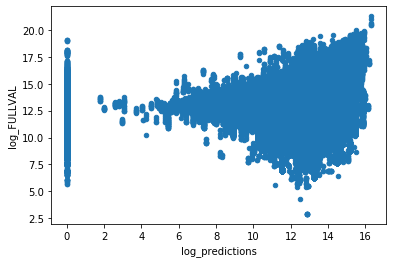

In [35]:
#as outliers dominate and the distributions are skewed consider log-scale
log_training_data.plot(x='log_predictions',y='log_FULLVAL',kind='scatter')#, logx=True, logy=True)

In [ ]:
from sklearn.externals import joblib

joblib.dump(lm,'lm.pkl')

In [ ]:
fig, ax = plt.subplots() #get axis to plot on
#ax.set_xscale('log'); ax.set_yscale('log') #set up log-scale for axis
#REStaten_.plot(x='LAND_SQUARE_FEET',y='SALE_PRICE',kind='scatter', logx=True, logy=True)
training_data.plot(ax=ax,kind='scatter',x='predictions',y='FULLVAL', title = 'Training Data Prediction Fit') #show the data
ax.plot(training_data.predictions,training_data.predictions,'r-'); #show the regression line
plt.show()

In [ ]:
test_data['predictions'] = lm.predict(test_data)
test_data.head()

#calculate R2 value
slope, intercept, r_value, p_value, std_err = stats.linregress(test_data.predictions, test_data.FULLVAL)
r_squared = r_value**2
print('r2: {}'.format(r_squared))

In [ ]:
fig, ax = plt.subplots() #get axis to plot on
#ax.set_xscale('log'); ax.set_yscale('log') #set up log-scale for axis
#REStaten_.plot(x='LAND_SQUARE_FEET',y='SALE_PRICE',kind='scatter', logx=True, logy=True)
test_data.plot(ax=ax,kind='scatter',x='predictions',y='FULLVAL', title = 'Test Data Prediction Fit') #show the data
ax.plot(test_data.predictions,test_data.predictions,'r-'); #show the regression line
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(training_data.corr())
plt.show()

corr = training_data.corr()
print(corr)

In [ ]:
edited_dataset = training_data[['FULLVAL', 'nearest_subway_entrance', 'nearest_park', 'normalized_arrest_cnt']].copy()

In [ ]:
lm3 = smf.ols(formula='FULLVAL~nearest_subway_entrance+nearest_park+normalized_arrest_cnt', data = edited_dataset).fit()
print(lm3.summary())

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(edited_dataset.corr())
plt.show()

edited_corr = edited_dataset.corr()
print(edited_corr)

In [ ]:
edited_dataset['prediction'] = lm3.predict()
edited_dataset.head()

In [ ]:
fig, ax = plt.subplots() #get axis to plot on
ax.set_xscale('log'); ax.set_yscale('log') #set up log-scale for axis
edited_dataset.plot(ax=ax,kind='scatter',x='prediction',y='FULLVAL') #show the data
ax.plot(edited_dataset.prediction,edited_dataset.prediction,'r-'); #show the regression line